<a href="https://colab.research.google.com/github/BadalGupta04/Picture-Perfect-Stories/blob/main/Picture_Perfect_Stories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install einops
!pip install accelerate
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 2.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#THISWILL DOWNLOAD ENTIRE MODEL OF 1.8 GB run this once
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

#Find a way to download and save this model in our local drive so that we can use it without downloading it again and again


In [ ]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path):
    try:
        img = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
# img_url = "/content/drive/MyDrive/SGP project/c.jpg"

img_url = "/content/drive/MyDrive/Picture Perfect Stories/Copy of i1.jpeg.jpg"

def image_caption(img_url):
  raw_image = Image.open(img_url)
  inputs = processor(raw_image, return_tensors="pt")
  out = model.generate(**inputs)
  return(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
def single_image_description(*args):
  caption_corpus=""
  for img_url in args:
    #displays images
    print("------------------------------------------------\n\n")
    display_image(img_url)
    print("------------------------------------------------\n\n")
    #Generate Image captions
    caption_corpus = caption_corpus + image_caption(img_url) + ". "

  #The prompt
  prompt="Write a story combining features from this photographs : "+ caption_corpus.title()

  sequences = pipeline(
   prompt,
    max_length=300,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
  )
  print("------------------------------------------")
  for seq in sequences:
      print(f"Result: {seq['generated_text']}")


------------------------------------------------




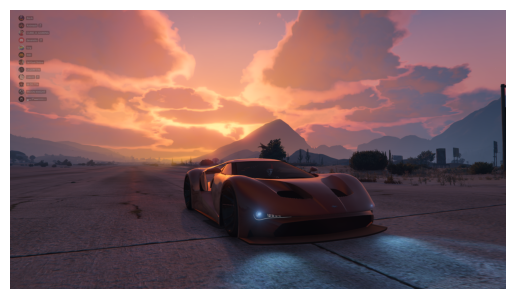

------------------------------------------------




/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


------------------------------------------
Result: Write a story combining features from this photographs : Arafed Car On A Road With A Sunset In The Background. 
As the sun slowly sank below the horizon, a solitary car rolled along a desolate highway. The sky painted itself a brilliant array of colors, casting an orange and pink hue over everything. The car's driver, Arafed, gazed out the window, the mesmerizing view filling him with a sense of peace. As he drove deeper into the countryside, the golden glow of the setting sun illuminated the road ahead, seemingly guiding him through the darkness.


In [ ]:
# Input images from ur path to try and
single_image_description("/content/drive/MyDrive/Picture Perfect Stories/Copy of c.jpg")

In [ ]:
def multiple_image_description(*args):
  caption_corpus=""
  for img_url in args:
    #displays images
    print("------------------------------------------------\n\n")
    display_image(img_url)
    print("------------------------------------------------\n\n")
    #Generate Image captions
    caption_corpus = caption_corpus + image_caption(img_url) + ". "

  #The prompt
  prompt="Write a story combining features from all these photographs : \n" + caption_corpus.title()

  sequences = pipeline(
   prompt,
    max_length=300,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
  )
  print("------------------------------------------")
  for seq in sequences:
      print("\n")
      print(f"Result: {seq['generated_text']}")


------------------------------------------------




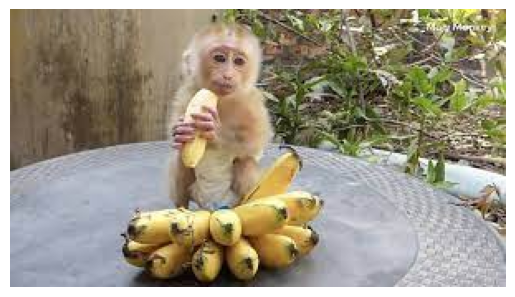

------------------------------------------------


------------------------------------------------




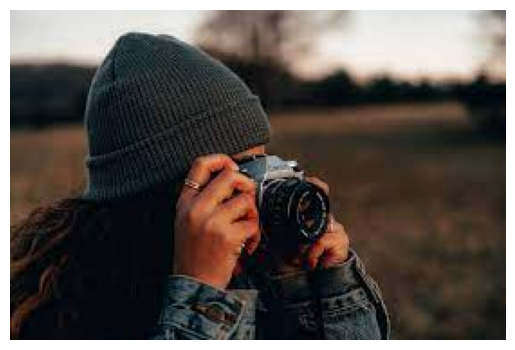

------------------------------------------------




Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


------------------------------------------


Result: Write a story combining features from all these photographs : 
There Is A Monkey Sitting On A Table With Bananas On It. A Woman Taking A Picture With A Camera In A Field. & A Man Sitting On The Sidewalk
In a field, there was a table with bananas on it, where a woman was taking pictures. Suddenly, a monkey appeared, sitting on the table, eating the bananas. The woman, who was taking pictures, saw the monkey and took a picture of it. The monkey seemed to understand the woman's actions and, out of curiosity, climbed onto her head and started playing with her hair. The woman was surprised yet delighted, and the monkey's unexpected presence filled her with joy and laughter.


In [ ]:
# # Input images from ur path to try and
multiple_image_description("/content/drive/MyDrive/Picture Perfect Stories/Copy of monkey.jpg","/content/drive/MyDrive/Picture Perfect Stories/Copy of picture.jpeg")

In [ ]:
def more_image_description(*args):
  caption_corpus=""
  for img_url in args:
    #displays images
    print("------------------------------------------------\n\n")
    display_image(img_url)
    print("------------------------------------------------\n\n")
    #Generate Image captions
    caption_corpus = caption_corpus + image_caption(img_url) + ". "

  #The prompt
  prompt="Write a story combining features from all these photographs : \n" + caption_corpus.title()

  sequences = pipeline(
   prompt,
    max_length=300,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
  )
  print("------------------------------------------")
  for seq in sequences:
      print("\n")
      print(f"Result: {seq['generated_text']}")


------------------------------------------------




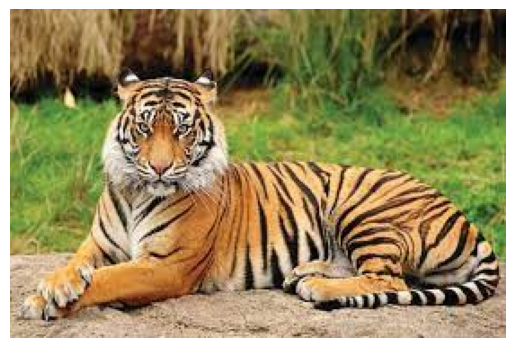

------------------------------------------------


------------------------------------------------




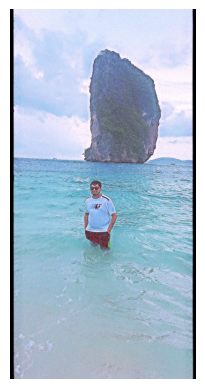

------------------------------------------------


------------------------------------------------




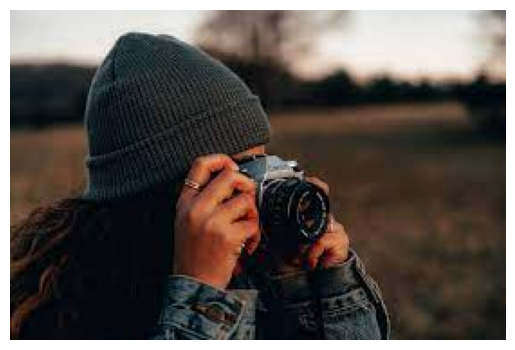

------------------------------------------------




Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


------------------------------------------


Result: Write a story combining features from all these photographs : 
There Is A Tiger That Is Laying Down On The Ground. There Is A Man Standing In The Water With A Rock In The Background. A Woman Taking A Picture With A Camera In A Field. (1 & 3)
A tiger lay down peacefully on the ground, soaking in the warmth of the African sun. An old man stood in the water, enjoying the calm, gentle waves as they lapped against his body. A woman held a camera in hand, taking in the beauty of the wilderness around her and capturing the serene moment with her lens.


In [ ]:
# # Input images from ur path to try and
more_image_description("/content/drive/MyDrive/Picture Perfect Stories/Copy of i1.jpeg.jpg","/content/drive/MyDrive/Picture Perfect Stories/Copy of yo.jpg","/content/drive/MyDrive/Picture Perfect Stories/Copy of picture.jpeg")